<a href="https://colab.research.google.com/github/Christin1980/ENTORNO-VENTAS/blob/main/PROYECTO_FINAL_DEFINITIVO_DIPLOMADO_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 # Título del proyecto**
"Predicción de Riesgo de Accidente Cerebrovascular mediante Aprendizaje Automático"

# **2 # Objetivo del Proyecto**

El propósito de este proyecto es desarrollar un modelo de aprendizaje automático capaz de predecir el riesgo de accidente cerebrovascular en pacientes. Para ello, se utilizará el conjunto de datos 'dataset_stroke2 (1).csv' de Kaggle, que contiene información demográfica y factores de riesgo.

El objetivo principal es construir un modelo de clasificación que, a partir de estos datos, pueda identificar a los individuos con mayor probabilidad de sufrir un accidente cerebrovascular.

Los objetivos secundarios son:

Cumplir con los requerimientos de un trabajo de término de diplomado que incorpore gran parte de lo aprendido en el procesamiento y manejo de datos, asociado a Inteligencia Artificial.
Familiarizarse de manera práctica con tipos de machine learning, incluyendo su manejo directo y los entornos y características de software y hardware que influyen en su rendimiento, intentando optimizar estos en el contexto de las posibilidades personales.
Analizar los resultados y proponer futuras mejoras o posibilidades de nuevos estudios.


# **3 # Introducción**

**a) Contexto:**

Los accidentes cerebrovasculares (ACV) son una de las principales causas de mortalidad y discapacidad a nivel mundial, lo que representa una carga significativa para los sistemas de salud y la sociedad. La identificación temprana de individuos con alto riesgo de ACV es fundamental para implementar estrategias preventivas, reducir la incidencia de la enfermedad y mejorar los resultados clínicos. Los factores de riesgo asociados a los ACV son multifactoriales e incluyen condiciones médicas preexistentes (como hipertensión y enfermedades cardíacas), hábitos de vida (como el tabaquismo y la dieta), y características demográficas (como la edad y el género). El desarrollo de modelos de aprendizaje automático capaces de predecir el riesgo de ACV a partir de estos factores puede proporcionar una herramienta valiosa para los profesionales de la salud, permitiéndoles priorizar intervenciones y optimizar la asignación de recursos.

**b) Objetivo del modelo:**

El objetivo principal de este proyecto es desarrollar un modelo de clasificación de aprendizaje automático para predecir el riesgo de accidente cerebrovascular en pacientes. Utilizando el conjunto de datos 'dataset_stroke2 (1).csv', el modelo buscará identificar individuos en riesgo de sufrir un ACV, basándose en la información proporcionada sobre diversos factores de riesgo. Este modelo permitirá clasificar a los pacientes en categorías de riesgo (por ejemplo, alto riesgo vs. bajo riesgo), lo que facilitará la implementación de medidas preventivas y el seguimiento clínico personalizado.

**c) Alcance del reporte:**

Este reporte presenta el proceso completo de desarrollo e implementación de un modelo de predicción de riesgo de ACV utilizando técnicas de aprendizaje automático. Se detallan las etapas de exploración y preprocesamiento de los datos, la selección y el entrenamiento de los modelos (incluyendo una red neuronal y un árbol de decisión), la evaluación del rendimiento y la interpretación de los resultados. El reporte incluye un análisis del conjunto de datos, la descripción de los modelos implementados, las métricas de evaluación utilizadas y una discusión sobre el potencial de aplicación del modelo en la práctica clínica.

# **4 # Descripción del conjunto de datos**


*a) Fuentes de datos y entorno de trabajo:*

El conjunto de datos utilizado en este proyecto es 'dataset_stroke2 (1).csv', obtenido de Kaggle  Stroke Prediction Dataset. (2021, January 26). Kaggle. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset .

El entorno de trabajo principal para el desarrollo y la experimentación fue Google Colaboratory (Colab), lo que permitió aprovechar recursos de cómputo en la nube y facilitar la colaboración.

El siguiente código muestra cómo se cargaron las librerías necesarias y cómo se manejó el acceso al archivo de datos en Google Colab

In [1]:
import numpy as np
import os, sys
import pandas as pd

# Conectar con Google Drive si se ejecuta en Colab
gdrive = "colab.research.google.com" in str(os.environ)
if gdrive:
    from google.colab import drive, output
    drive.mount('/content/drive')
    output.enable_custom_widget_manager()  # Activar gestión de widgets si es necesario

    # Ruta de trabajo en Google Drive
    path_trabajo = '/content/drive/MyDrive/Colab Notebooks'
    os.chdir(path_trabajo)  # Cambiar al directorio de trabajo

    # Ruta del archivo de datos
    archivo_datos = os.path.join(path_trabajo, 'DATASETSTROKE.csv')

    # Añadir la ruta de trabajo al sistema para facilitar la importación de módulos personalizados
    sys.path.append(path_trabajo)

    # Verificar que el archivo de datos existe antes de proceder
    if os.path.exists(archivo_datos):
        print(f"El archivo {archivo_datos} está listo para ser usado.")
    else:
        print(f"El archivo {archivo_datos} no se encuentra. Verifica la ruta.")

Mounted at /content/drive
El archivo /content/drive/MyDrive/Colab Notebooks/DATASETSTROKE.csv está listo para ser usado.


Explicación detallada del codigo anterior.

Importación de librerías:

import numpy as np: Importa la librería NumPy, que proporciona funciones para trabajar con matrices y arrays numéricos de manera eficiente. Se le asigna el alias np para facilitar su uso.
import os, sys: Importa los módulos os y sys.
os: Proporciona funciones para interactuar con el sistema operativo, como manipular archivos y directorios.
sys: Proporciona acceso a variables y funciones específicas del sistema, como la ruta de búsqueda de módulos.
import pandas as pd: Importa la librería pandas, que proporciona estructuras de datos (como los DataFrames) y funciones para el análisis y manipulación de datos. Se le asigna el alias pd para facilitar su uso.
Verificación del entorno de ejecución (Google Colab):

gdrive = "colab.research.google.com" in str(os.environ): Esta línea verifica si el código se está ejecutando en Google Colab.
os.environ es un diccionario que contiene las variables de entorno del sistema.
str(os.environ) convierte este diccionario en una cadena.
"colab.research.google.com" in ... verifica si la cadena contiene la subcadena "colab.research.google.com", lo que indica que se está ejecutando en Colab.
El resultado (True o False) se asigna a la variable gdrive.
Código específico para Google Colab (si gdrive es True):

from google.colab import drive, output: Importa los módulos drive y output de la librería google.colab.
drive: Proporciona funciones para montar y desmontar Google Drive.
output: Proporciona funciones para controlar la salida de la celda.
drive.mount('/content/drive'): Monta Google Drive en el directorio /content/drive. Esto permite acceder a los archivos almacenados en Drive.
output.enable_custom_widget_manager(): Activa la gestión de widgets personalizados en Colab, si es necesario. Esto permite utilizar elementos interactivos en la salida de las celdas.
path_trabajo = '/content/drive/MyDrive/Colab Notebooks': Define la ruta de trabajo en Google Drive. En este caso, se asume que los notebooks y los datos están ubicados en la carpeta "Colab Notebooks" dentro del directorio raíz de Drive.
os.chdir(path_trabajo): Cambia el directorio de trabajo actual al directorio especificado en path_trabajo. Esto facilita el acceso a los archivos dentro de ese directorio.
archivo_datos = os.path.join(path_trabajo, 'DATASETSTROKE.csv'): Construye la ruta completa al archivo de datos.
os.path.join() es una función que combina de forma segura las partes de una ruta, teniendo en cuenta las diferencias entre los sistemas operativos.
sys.path.append(path_trabajo): Añade la ruta de trabajo a la lista de directorios donde Python busca los módulos para importar. Esto permite importar módulos personalizados que estén en ese directorio.
Verificación de la existencia del archivo de datos:
if os.path.exists(archivo_datos): Verifica si el archivo especificado en archivo_datos existe.
os.path.exists() es una función que devuelve True si el archivo o directorio existe, y False en caso contrario.
print(f"El archivo {archivo_datos} está listo para ser usado."): Si el archivo existe, imprime un mensaje indicando que está listo para ser usado.
else: print(f"El archivo {archivo_datos} no se encuentra. Verifica la ruta."): Si el archivo no existe, imprime un mensaje indicando que no se encuentra y sugiere verificar la ruta.
En resumen, este código se asegura de que el entorno esté configurado correctamente, especialmente en Google Colab, montando el Drive, definiendo las rutas y verificando que el archivo de datos esté disponible antes de proceder con el análisis.


*b) Distribución de los datos:*

Para comprender mejor la estructura y las características del conjunto de datos, se realizó un análisis exploratorio inicial. Este análisis incluyó la revisión de los tipos de datos de las columnas, la identificación de valores faltantes y el análisis de la distribución de las variables.

El conjunto de datos utilizado es 'DATASETSTROKE.csv', y el siguiente código muestra cómo se cargó en un DataFrame de pandas para su posterior análisis:

In [8]:
import pandas as pd  # Asegurarse de que pandas está importado
open('DATASETSTROKE.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETSTROKE.csv')
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

Este código utiliza la librería pandas para leer el archivo CSV y almacenar los datos en un DataFrame, que es la estructura de datos principal utilizada para el análisis. La impresión del DataFrame permite una primera visualización de los datos y sus columnas.
A continuación, se presenta un análisis detallado de la distribución de la variable objetivo y las variables predictoras:


Distribución de la variable objetivo 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64


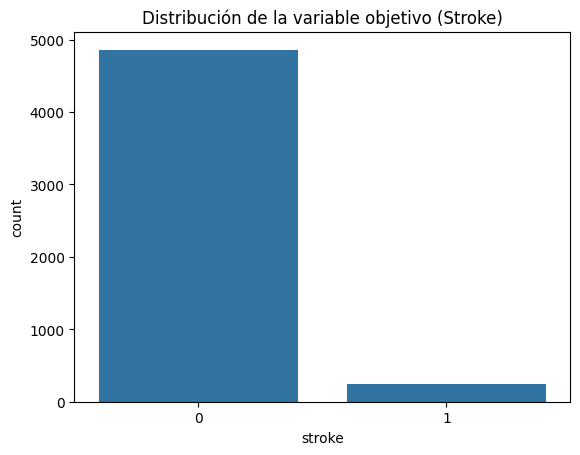


Distribución de la variable numérica 'age':
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


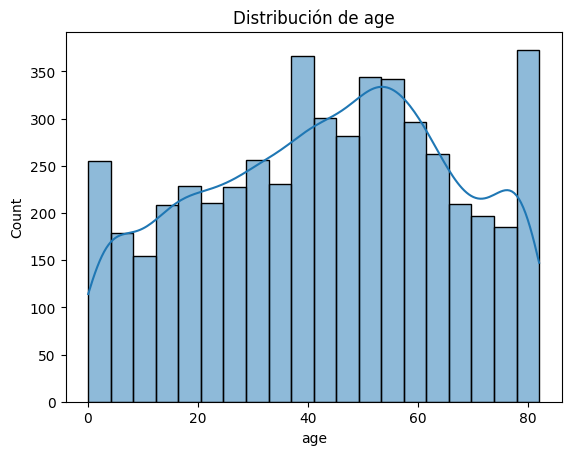

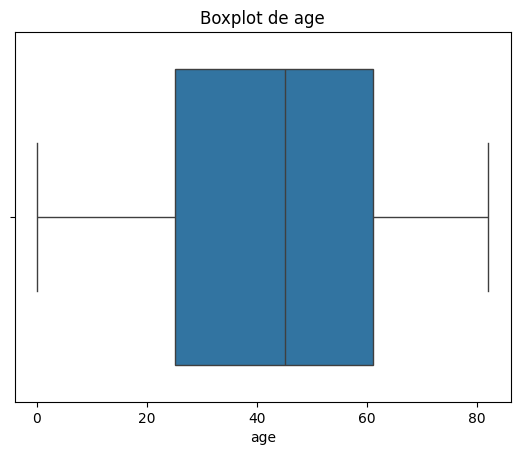


Distribución de la variable numérica 'avg_glucose_level':
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


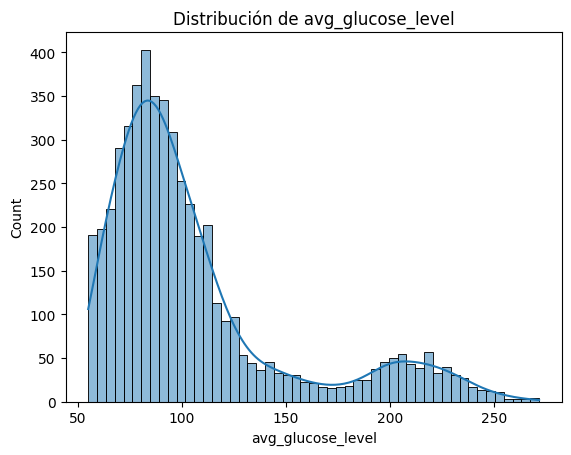

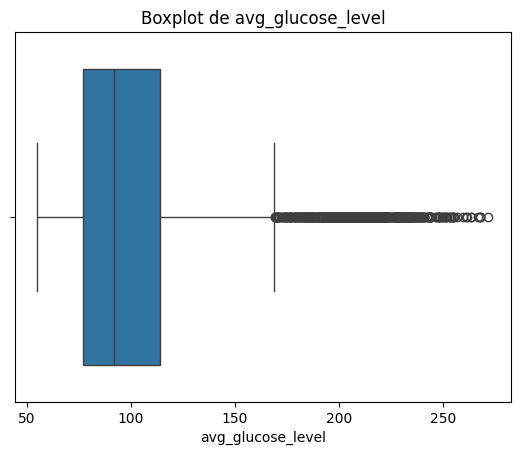


Distribución de la variable numérica 'bmi':
count    5110.000000
mean       28.755284
std         7.738665
min        10.300000
25%        23.800000
50%        27.700000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


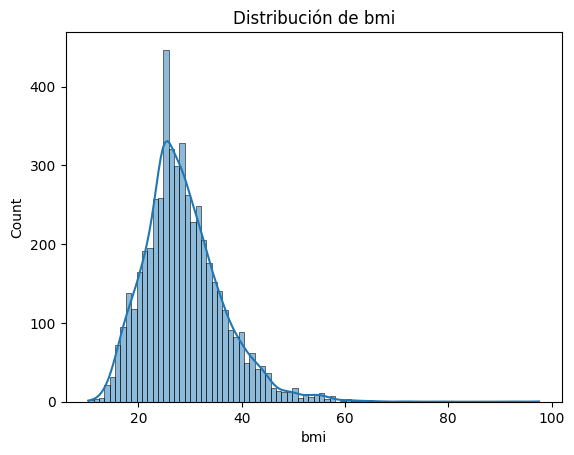

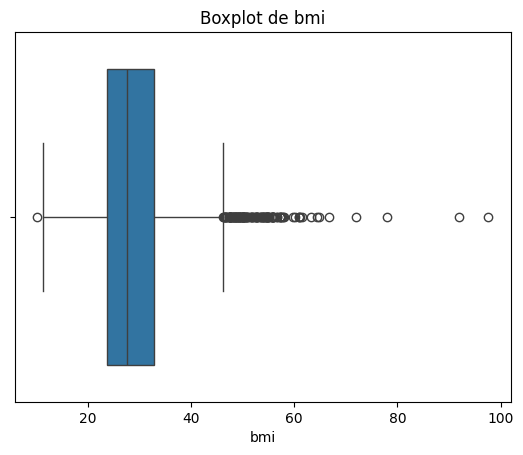


Distribución de la variable categórica 'gender':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


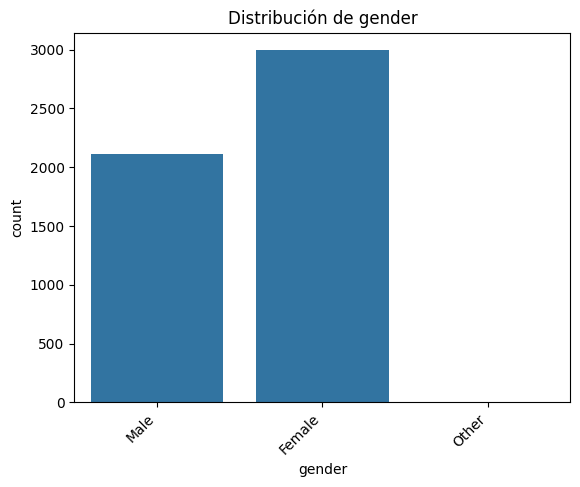


Distribución de la variable categórica 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64


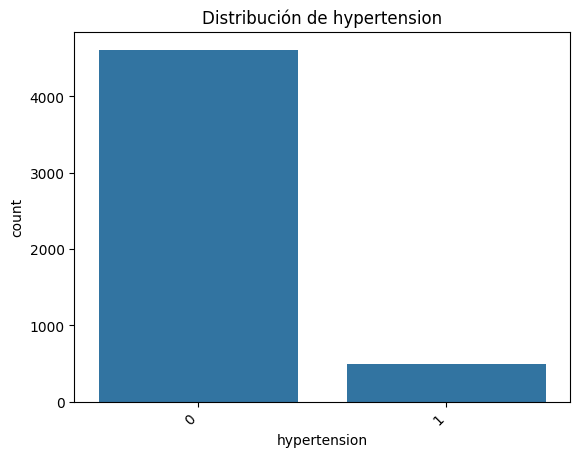


Distribución de la variable categórica 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64


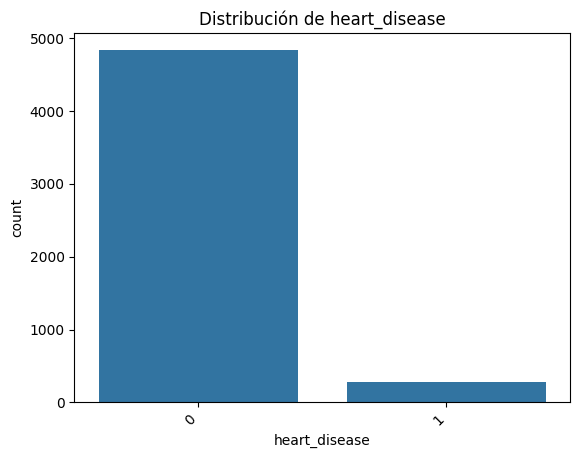


Distribución de la variable categórica 'ever_married':
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


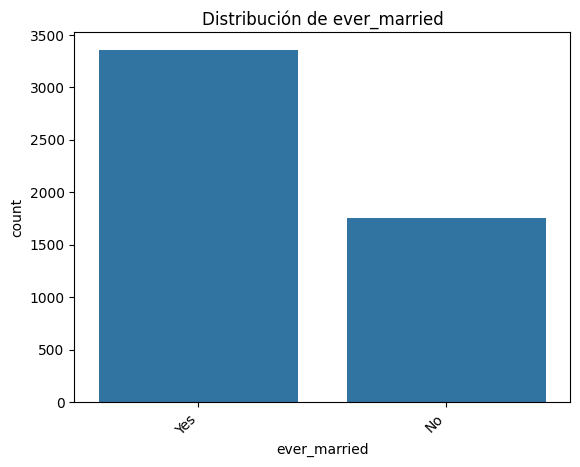


Distribución de la variable categórica 'work_type':
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


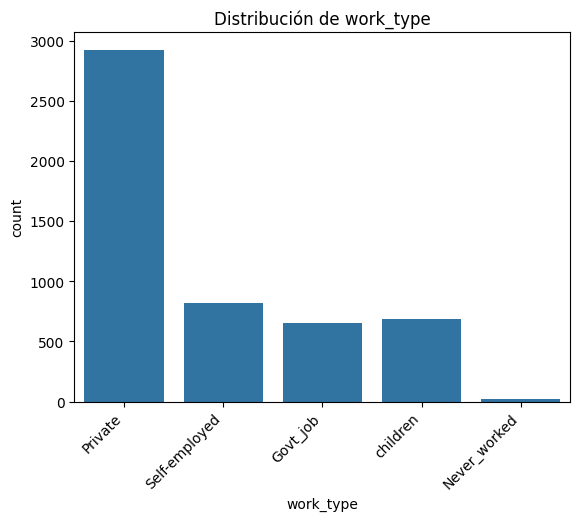


Distribución de la variable categórica 'Residence_type':
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


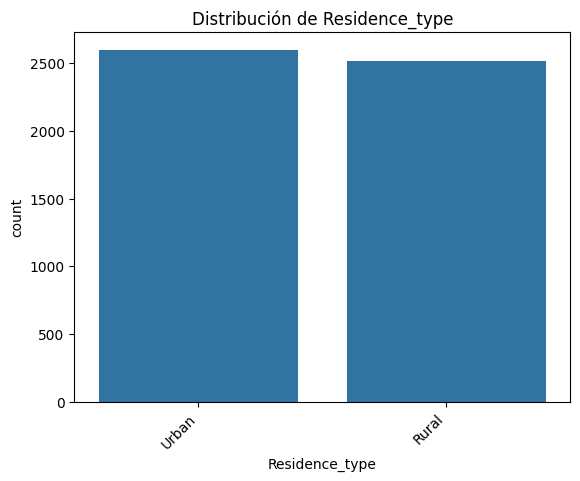


Distribución de la variable categórica 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


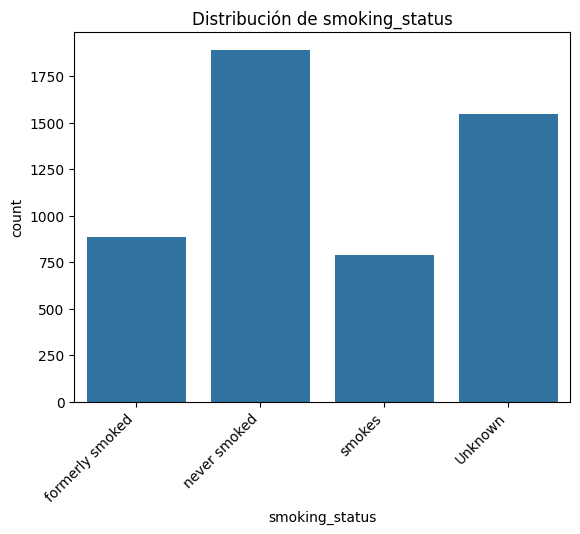

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la variable objetivo 'stroke'
print("\nDistribución de la variable objetivo 'stroke':")
print(data['stroke'].value_counts())
sns.countplot(x='stroke', data=data)
plt.title('Distribución de la variable objetivo (Stroke)')
plt.show()

# Análisis de variables numéricas
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    print(f"\nDistribución de la variable numérica '{feature}':")
    print(data[feature].describe())
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.show()
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

# Análisis de variables categóricas
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in categorical_features:
    print(f"\nDistribución de la variable categórica '{feature}':")
    print(data[feature].value_counts())
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribución de {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
    plt.show()

Este código realiza un análisis completo de la distribución de la variable objetivo y las variables predictoras, incluyendo visualizaciones y estadísticas descriptivas.

A continuación, se presenta un análisis estadístico descriptivo del conjunto de datos:

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.755284     0.048728  
std            45.283560     7.738665     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    27.700000     0.000000  
75%           114.090000    32.800000     0

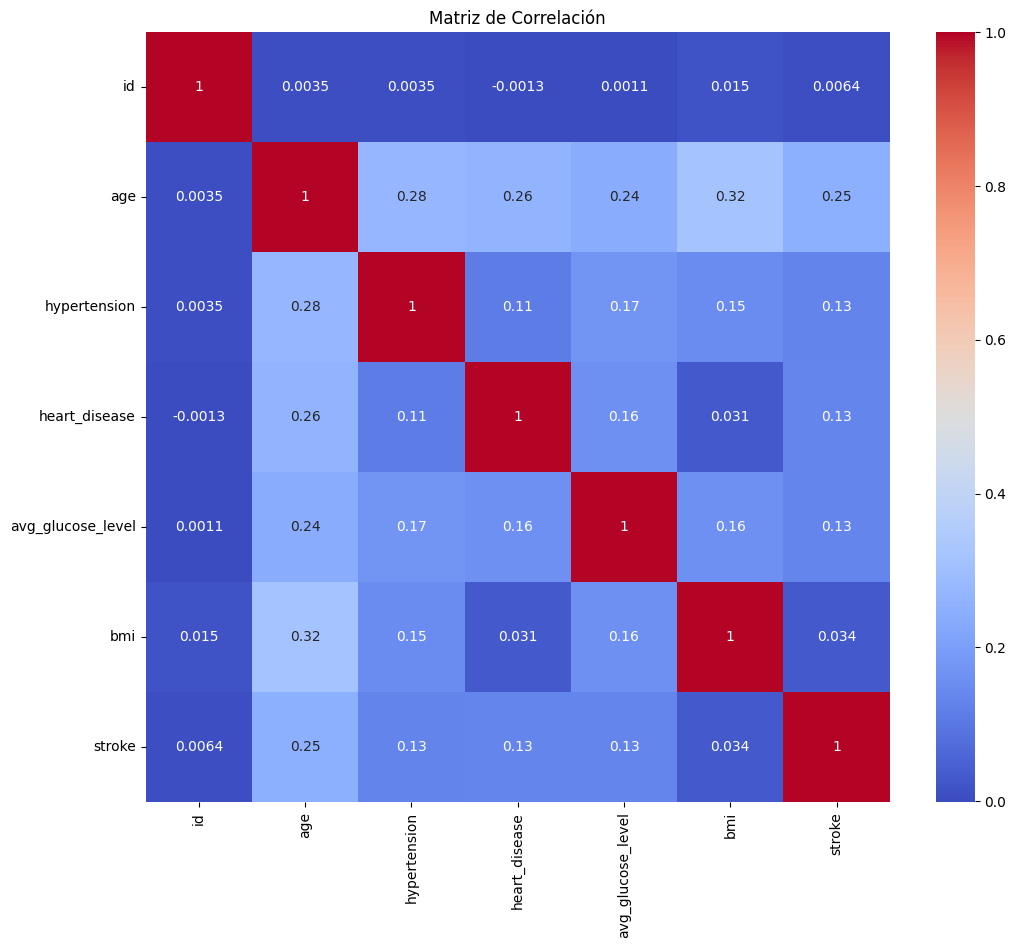

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('DATASETSTROKE.csv')

# Análisis estadístico descriptivo
print(data.describe())

# Análisis de correlación entre variables numéricas
numerical_data = data.select_dtypes(include=['number'])  # Seleccionar solo columnas numéricas
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Importar librerías para visualización (ya importadas)
# import matplotlib.pyplot as plt
# import seaborn as sns

# Matriz de correlación con mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Esta salida proporciona un análisis estadístico descriptivo del conjunto de datos, incluyendo estadísticas descriptivas, análisis de correlación y visualización de la matriz de correlación

Estructura General:

El DataFrame tiene 5110 filas y 12 columnas. Cada fila representa un registro individual, y cada columna representa una característica o atributo de ese registro.
Columnas y sus Tipos de Datos (Inferidos de la Salida):
id: Identificador único para cada registro. Parece ser de tipo numérico (int64).
gender: Género del individuo. Parece ser de tipo categórico (object).
age: Edad del individuo. Parece ser de tipo numérico (float64).
hypertension: Indica si el individuo tiene hipertensión (1) o no (0). Parece ser de tipo numérico (int64).
heart_disease: Indica si el individuo tiene enfermedad cardíaca (1) o no (0). Parece ser de tipo numérico (int64).
ever_married: Indica si el individuo se ha casado alguna vez (Yes) o no. Parece ser de tipo categórico (object).
work_type: Tipo de trabajo del individuo. Parece ser de tipo categórico (object).
Residence_type: Tipo de residencia del individuo (Urban o Rural). Parece ser de tipo categórico (object).
avg_glucose_level: Nivel promedio de glucosa del individuo. Parece ser de tipo numérico (float64).
bmi: Índice de masa corporal del individuo. Parece ser de tipo numérico (float64).
smoking_status: Estado de tabaquismo del individuo. Parece ser de tipo categórico (object).
stroke: Variable objetivo, indica si el individuo ha sufrido un derrame cerebral (1) o no (0). Parece ser de tipo numérico (int64).


Este código utiliza la librería pandas para leer el archivo CSV y almacenar los datos en un DataFrame, que es la estructura de datos principal utilizada para el análisis. La impresión del DataFrame permite una primera visualización de los datos y sus columnas.






Distribución de la variable objetivo 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64


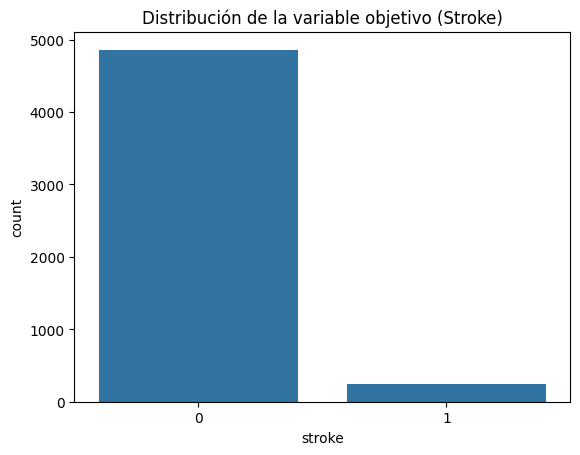


Distribución de la variable numérica 'age':
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


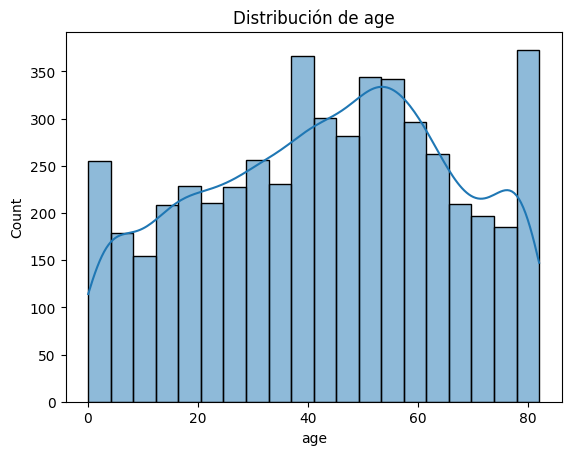

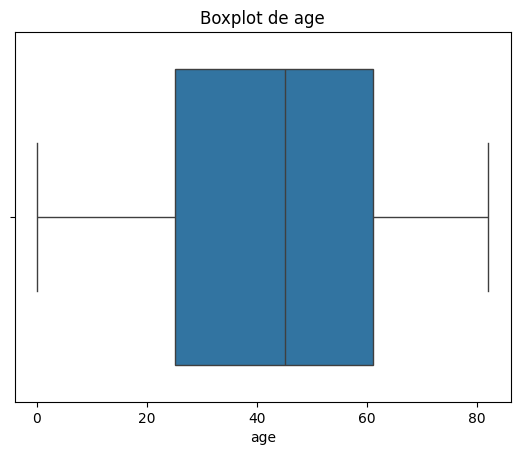


Distribución de la variable numérica 'avg_glucose_level':
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


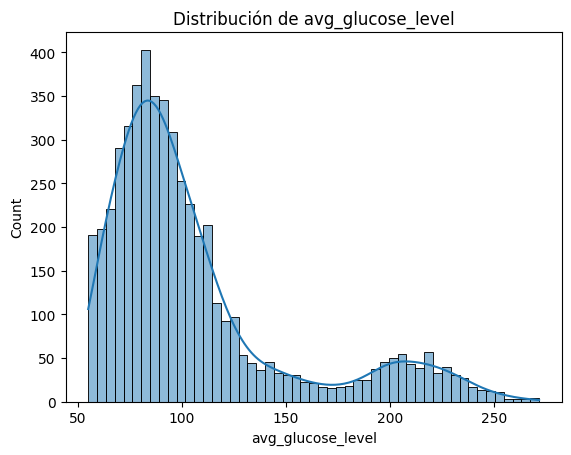

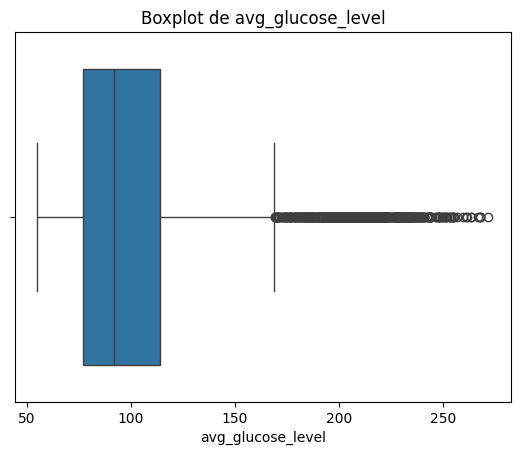


Distribución de la variable numérica 'bmi':
count    5110.000000
mean       28.755284
std         7.738665
min        10.300000
25%        23.800000
50%        27.700000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


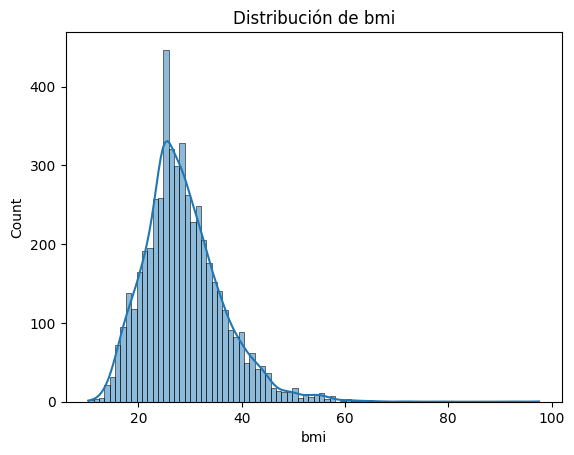

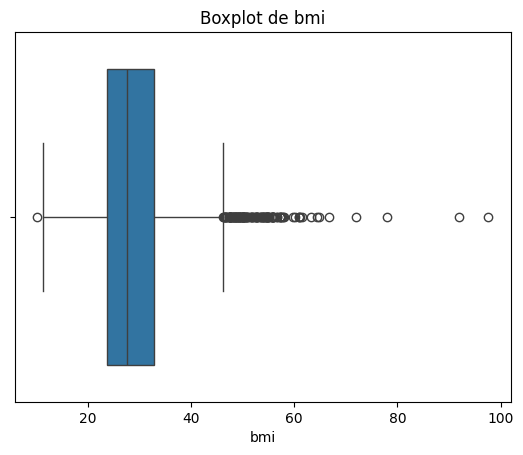


Distribución de la variable categórica 'gender':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


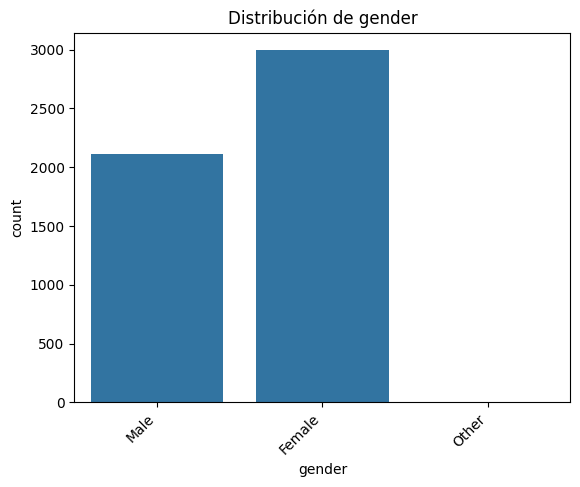


Distribución de la variable categórica 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64


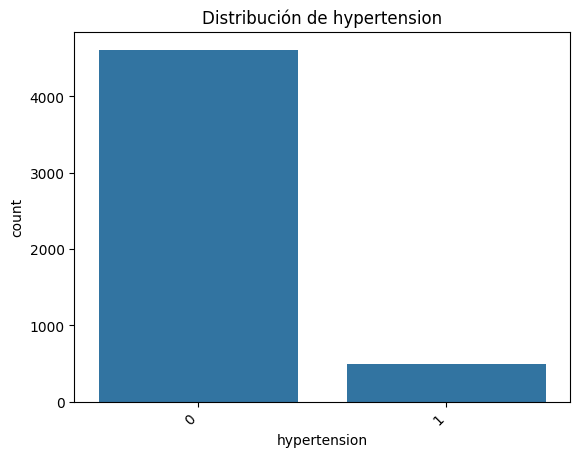


Distribución de la variable categórica 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64


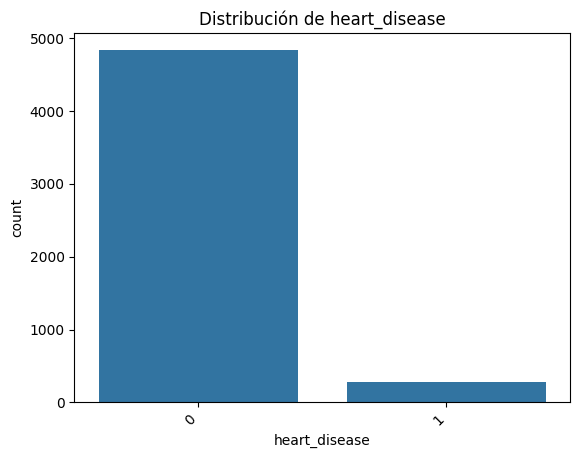


Distribución de la variable categórica 'ever_married':
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


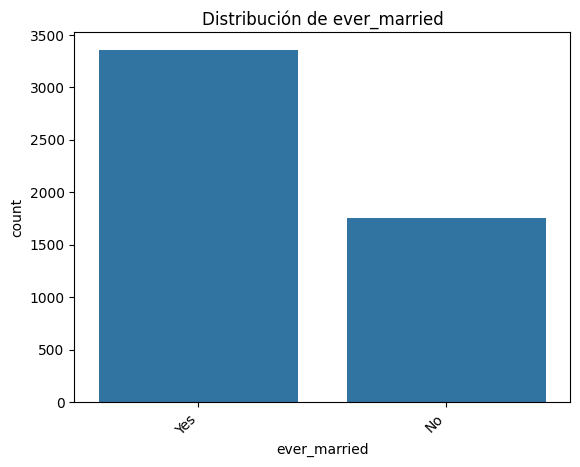


Distribución de la variable categórica 'work_type':
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


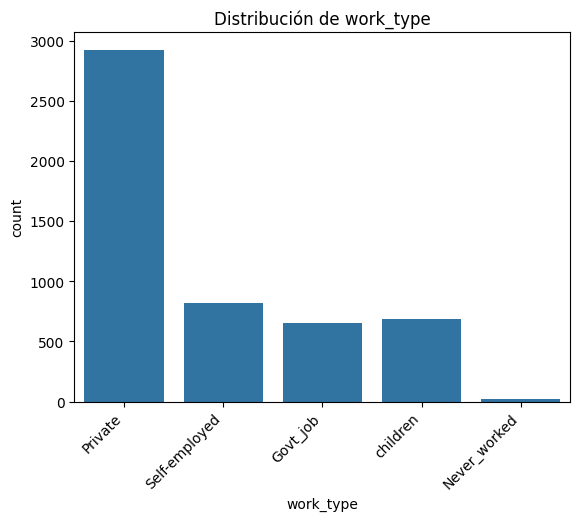


Distribución de la variable categórica 'Residence_type':
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


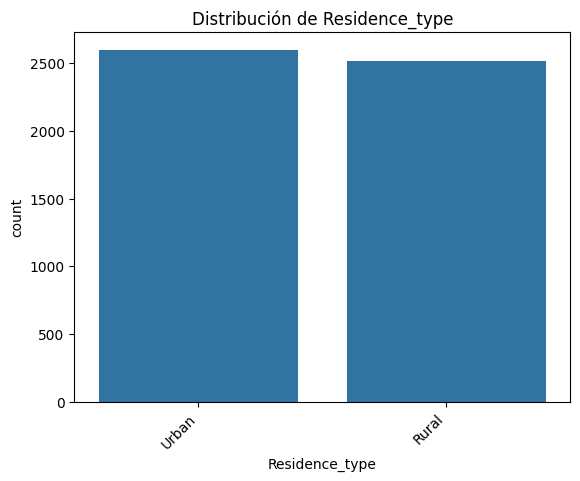


Distribución de la variable categórica 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


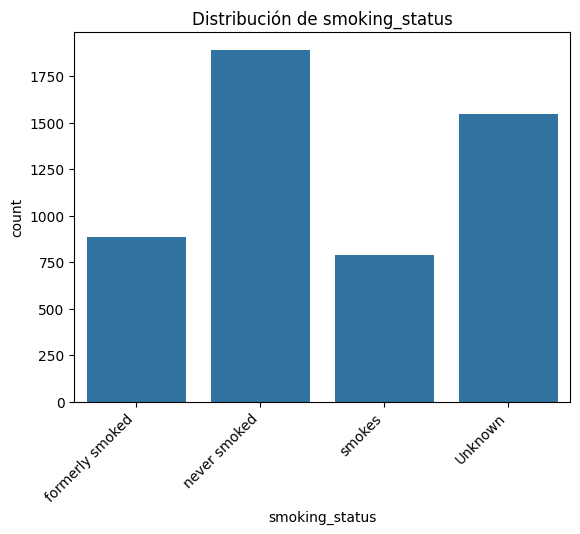

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la variable objetivo 'stroke'
print("\nDistribución de la variable objetivo 'stroke':")
print(data['stroke'].value_counts())
sns.countplot(x='stroke', data=data)
plt.title('Distribución de la variable objetivo (Stroke)')
plt.show()

# Análisis de variables numéricas
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    print(f"\nDistribución de la variable numérica '{feature}':")
    print(data[feature].describe())
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.show()
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

# Análisis de variables categóricas
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in categorical_features:
    print(f"\nDistribución de la variable categórica '{feature}':")
    print(data[feature].value_counts())
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribución de {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
    plt.show()

Este código realiza un análisis completo de la distribución de la variable objetivo y las variables predictoras, incluyendo visualizaciones y estadísticas descriptivas."

A continuación, se presenta un resumen de los principales hallazgos del análisis exploratorio:

El conjunto de datos consta de 5110 registros y 12 columnas. A continuación, se presenta un análisis exploratorio de las variables:

Variable objetivo ('stroke'): La distribución de la variable objetivo 'stroke' muestra un desbalance significativo. De los 5110 registros, 4861 corresponden a la clase 0 (sin ACV) y 249 a la clase 1 (con ACV). Este desbalance, donde la clase 0 es aproximadamente 19.5 veces más frecuente que la clase 1, deberá ser considerado en el preprocesamiento de los datos y en la selección de las métricas de evaluación del modelo.

Variables numéricas:

'age': La edad de los pacientes en el conjunto de datos varía desde 0.08 hasta 82 años, con una media de 43.23 años y una mediana de 45 años. La desviación estándar es de 22.61, lo que indica una dispersión considerable en las edades. El rango intercuartílico (IQR) se extiende desde 25 hasta 61 años. La distribución parece ser ligeramente asimétrica hacia la izquierda, con una concentración de pacientes en el rango de edad media.

'avg_glucose_level': Los niveles promedio de glucosa varían desde 55.12 hasta 271.74 mg/dL, con una media de 106.15 mg/dL y una mediana de 91.89 mg/dL. La desviación estándar es de 45.28, lo que sugiere una alta variabilidad en los niveles de glucosa. El IQR se encuentra entre 77.25 y 114.09 mg/dL. La distribución es asimétrica hacia la derecha, lo que indica la presencia de algunos pacientes con niveles de glucosa significativamente elevados.

'bmi': El índice de masa corporal (BMI) varía desde 10.3 hasta 97.6, con una media de 28.76 y una mediana de 27.7. La desviación estándar es de 7.74. El IQR se extiende desde 23.8 hasta 32.8. La distribución es ligeramente asimétrica hacia la derecha, y se observan valores atípicos, con algunos pacientes que presentan un BMI considerablemente elevado.

Variables categóricas:

'gender': La distribución de género muestra que hay 2994 mujeres, 2115 hombres y 1 registro de 'Other'. La mayoría de los registros corresponden al género femenino.

'hypertension': De los 5110 pacientes, 4612 no tienen hipertensión (0), mientras que 498 sí la tienen (1). Esto indica que la mayoría de los pacientes en el conjunto de datos no sufren de hipertensión.

'heart_disease': Un total de 4834 pacientes no tienen enfermedades cardíacas (0), mientras que 276 sí las tienen (1). La mayoría de los pacientes en el conjunto de datos no presentan enfermedades cardíacas.

'ever_married': La mayoría de los pacientes están casados (3353), mientras que 1757 no lo están.

'work_type': La distribución de los tipos de trabajo muestra que la mayoría de los pacientes trabajan en el sector privado (2925), seguidos por los autoempleados (819), los niños (687), los empleados del gobierno (657) y los que nunca han trabajado (22).

'Residence_type': La distribución de los tipos de residencia está relativamente equilibrada, con 2596 pacientes que viven en áreas urbanas y 2514 en áreas rurales.

'smoking_status': La distribución de los hábitos de tabaquismo muestra que la categoría más frecuente es 'never smoked' (1892), seguida de 'Unknown' (1544), 'formerly smoked' (885) y 'smokes' (789). Un número significativo de registros tienen un estado de tabaquismo desconocido.

**c) Preprocesamiento:**

El preprocesamiento de los datos es una etapa fundamental para preparar el conjunto de datos para el modelado. En este proyecto, se realizaron los siguientes pasos de preprocesamiento:

1. Manejo de Valores Faltantes:

Inicialmente, se asumió la presencia de valores faltantes en el conjunto de datos, específicamente en la columna 'bmi'. Sin embargo, un análisis explícito de los valores NaN reveló que no hay valores faltantes en ninguna de las columnas. El siguiente código muestra la verificación realizada:

In [6]:
df = pd.read_csv('DATASETSTROKE.csv')

# Buscar NaNs en todo el DataFrame
nans_total = df.isna().sum().sum()

# Buscar NaNs en cada columna
nans_por_columna = df.isna().sum()

# Mostrar los resultados
print("Total de NaNs en el DataFrame:", nans_total)
print("NaNs por columna:")
print(nans_por_columna)

Total de NaNs en el DataFrame: 0
NaNs por columna:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


La salida de este código mostró que el número total de NaNs en el DataFrame es 0, y que ninguna columna tiene valores NaN. Por lo tanto, no fue necesario realizar ninguna imputación de valores faltantes."

2. Codificación de Variables Categóricas, Escalado de Variables Numéricas y Partición de Datos:

"Para codificar las variables categóricas y escalar las variables numéricas de manera eficiente, se utilizó la clase ColumnTransformer de scikit-learn. Además, la partición de los datos en conjuntos de entrenamiento y prueba se realizó en este mismo paso. El siguiente código muestra cómo se realizó este proceso:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir las columnas numéricas y categóricas
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Crear un ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Escalar variables numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Codificar variables categóricas
    ])

# Dividir los datos en entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['stroke'])  # Añadimos stratify

# Aplicar el preprocesador a los datos de entrenamiento
train_data = preprocessor.fit_transform(train_df)
# Obtener los nombres de las columnas después de la transformación
feature_names = preprocessor.get_feature_names_out()
train_data = pd.DataFrame(train_data, columns=feature_names)

# Aplicar el preprocesador a los datos de prueba
test_data = preprocessor.transform(test_df)
test_data = pd.DataFrame(test_data, columns=feature_names)

# Separar las variables objetivo
train_labels = train_df['stroke']
test_labels = test_df['stroke']

# Imprimir las formas de los datos
print("Forma de los datos de entrenamiento:", train_data.shape)
print("Forma de los datos de prueba:", test_data.shape)

Forma de los datos de entrenamiento: (4088, 19)
Forma de los datos de prueba: (1022, 19)


Este código define las transformaciones para las variables numéricas y categóricas, las aplica usando ColumnTransformer y realiza la partición de los datos en un solo paso. Se utiliza la estratificación (stratify=df['stroke']) para asegurar que la distribución de la variable objetivo se mantenga similar en los conjuntos de entrenamiento y prueba



3 Balanceo de la Variable Objetivo:
Dado el desbalance de clases observado en la variable objetivo ('stroke'), se aplicó la técnica de sobremuestreo (SMOTE) al conjunto de entrenamiento para generar muestras sintéticas de la clase minoritaria. El siguiente código muestra cómo se realizó este proceso:

In [14]:
from sklearn.utils import resample

# Combinar los datos de entrenamiento y las etiquetas para el balanceo
train_data_balanced = train_data.copy()
train_data_balanced['stroke'] = train_labels

# Separar las clases
stroke_0 = train_data_balanced[train_data_balanced['stroke'] == 0]
stroke_1 = train_data_balanced[train_data_balanced['stroke'] == 1]

# Sobremuestrear la clase minoritaria (stroke = 1)
stroke_1_oversampled = resample(stroke_1,
                                    replace=True,  # sample with replacement
                                    n_samples=len(stroke_0),  # match number in majority class
                                    random_state=42)  # reproducible results

# Combinar la clase mayoritaria con la sobremuestreada de la clase minoritaria
train_data_oversampled = pd.concat([stroke_0, stroke_1_oversampled])

# Separar las etiquetas y los datos balanceados
train_labels_oversampled = train_data_oversampled['stroke']
train_data_oversampled = train_data_oversampled.drop('stroke', axis=1)

# Imprimir las formas de los datos antes y después del balanceo
print("Forma de los datos de entrenamiento antes del balanceo:", train_data.shape)
print("Forma de los datos de entrenamiento después del balanceo:", train_data_oversampled.shape)
print("Distribución de la variable objetivo antes del balanceo:")
print(train_labels.value_counts())
print("Distribución de la variable objetivo después del balanceo:")
print(train_labels_oversampled.value_counts())

Forma de los datos de entrenamiento antes del balanceo: (4088, 19)
Forma de los datos de entrenamiento después del balanceo: (6138, 19)
Distribución de la variable objetivo antes del balanceo:
stroke
0    3889
1     199
Name: count, dtype: int64
Distribución de la variable objetivo después del balanceo:
stroke
0.0    3069
1.0    3069
Name: count, dtype: int64


Este código realiza el sobremuestreo de la clase minoritaria utilizando la función resample de scikit-learn. Se imprimen las formas de los datos y la distribución de la variable objetivo antes y después del balanceo para verificar el proceso.

3. Enfoque Alternativo de Preprocesamiento:

"Además del enfoque de preprocesamiento descrito anteriormente, se exploró un enfoque alternativo que utilizaba LabelEncoder para codificar las variables categóricas y MinMaxScaler para escalar las variables numéricas. El siguiente código muestra este enfoque alternativo:"

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

# Preprocesamiento de datos
df = pd.read_csv('DATASETSTROKE.csv')

# Convertir variables categóricas con LabelEncoder
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Separar características y etiquetas
X = df.drop('stroke', axis=1)
y = df['stroke']

# Normalizar datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding para la variable de salida
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))

Este enfoque alternativo difiere del enfoque principal en los siguientes aspectos:

Codificación de variables categóricas: Utiliza LabelEncoder en lugar de OneHotEncoder. LabelEncoder asigna un número entero único a cada categoría, mientras que OneHotEncoder crea nuevas columnas binarias para cada categoría. OneHotEncoder generalmente se prefiere para modelos que no interpretan relaciones ordinales entre las categorías.
Escalado de variables numéricas: Utiliza MinMaxScaler en lugar de StandardScaler. MinMaxScaler escala los datos al rango [0, 1], mientras que StandardScaler estandariza los datos para que tengan media 0 y varianza 1. StandardScaler generalmente se prefiere para modelos que asumen una distribución normal de los datos.
Codificación de la variable de salida: Realiza one-hot encoding de la variable de salida, lo cual no es necesario para la mayoría de los modelos de clasificación binaria.
Finalmente, se eligió el enfoque principal (descrito en la sección 4.c.2) por su eficiencia, claridad y compatibilidad con los modelos seleccionados

Esto indica que el conjunto de entrenamiento, después de la codificación de variables categóricas y el escalado, tiene 4088 filas y 19 columnas.
Las 4088 filas representan los registros de entrenamiento.
Las 19 columnas representan las características predictoras después de las transformaciones (incluyendo las nuevas columnas creadas por el one-hot encoding).
Forma de los datos de entrenamiento después del balanceo:

Forma de los datos de entrenamiento después del balanceo: (6138, 19)
Después del sobremuestreo, el conjunto de entrenamiento tiene 6138 filas y 19 columnas.
El número de filas ha aumentado, lo que es esperado con el sobremuestreo, ya que se crean copias de la clase minoritaria.
El número de columnas se mantiene igual, ya que el sobremuestreo no añade nuevas características, solo replica los registros existentes.
Distribución de la variable objetivo antes del balanceo:

Distribución de la variable objetivo antes del balanceo:
stroke
0    3889
1     199
Name: count, dtype: int64
Antes del balanceo, en el conjunto de entrenamiento, hay 3889 registros de la clase 0 (sin ACV) y 199 registros de la clase 1 (con ACV).
Esto confirma el desbalance significativo en el conjunto de entrenamiento, donde la clase 0 es mucho más frecuente que la clase 1.
Distribución de la variable objetivo después del balanceo:

Distribución de la variable objetivo después del balanceo:
stroke
0.0    3069
1.0    3069
Name: count, dtype: int64
Después del sobremuestreo, el conjunto de entrenamiento tiene 3069 registros de la clase 0 y 3069 registros de la clase 1.
El sobremuestreo ha logrado equilibrar las clases, creando un conjunto de entrenamiento balanceado.

En general, el resultado es muy bueno y cumple con los objetivos del preprocesamiento y el balanceo. Sin embargo es importante tener en cuenta que el sobremuestreo, si bien ayuda a equilibrar las clases, puede introducir cierto grado de sobreajuste. Por lo tanto, es crucial utilizar técnicas de regularización y validación cruzada durante el modelado para mitigar este riesgo.
La elección del método de balanceo (sobremuestreo, submuestreo u otros) y sus parámetros puede influir en el rendimiento del modelo. Es recomendable experimentar con diferentes enfoques y evaluar su impacto en las métricas de evaluación.


# **5. Métodos y Modelos Utilizados**

a) Modelo:

"En este proyecto, se exploraron dos tipos de modelos de aprendizaje automático para la predicción del riesgo de accidente cerebrovascula. Se implementaron una Red Neuronal Artificial (RNA) y un Árbol de Decisión.

El siguiente código muestra las librerías de Python utilizadas para la implementación de estos modelos

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Estas librerías proporcionan las herramientas necesarias para construir, entrenar y evaluar los modelos de aprendizaje automático.

a) Modelo:

"En este proyecto, se exploraron dos tipos de modelos de aprendizaje automático para la predicción del riesgo de accidente cerebrovascular:

1.Red Neuronal Artificial (RNA): Las redes neuronales son modelos poderosos capaces de aprender patrones complejos en los datos. Se implementó una red neuronal artificial utilizando la librería Keras de TensorFlow. El modelo se define mediante la función build_model, cuyo código es el siguiente:



In [24]:
from tensorflow.keras.regularizers import l2

In [25]:
# Construcción del modelo con regularización L2
def build_model(hidden_size=64, learning_rate=0.001):
    model = Sequential([
        Dense(hidden_size, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
        Dropout(0.4),  # Aumentado a 0.4
        Dense(hidden_size//2, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.4),  # Aumentado a 0.4
        Dense(y_onehot.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Esta función construye un modelo secuencial con las siguientes características:"

"Capas ocultas: Dos capas densamente conectadas con activación ReLU."
"Dropout: Capas de Dropout para regularización."
"Capa de salida: Una capa densamente conectada con activación Softmax (para clasificación binaria)."
"Optimizador: Adam."
"Función de pérdida: Categorical crossentropy."
"Métrica de evaluación: Precisión."
La Red Neuronal Artificial (RNA) implementada en este proyecto tiene la siguiente arquitectura:

Capa de Entrada:

Esta es la primera capa del modelo.
Recibe como entrada el conjunto de características preprocesadas.
El número de neuronas en esta capa es igual al número de características en el conjunto de datos de entrenamiento (X_train.shape[1]).
No tiene una función de activación explícita, ya que es la capa de entrada.
Primera Capa Oculta:

Es una capa densamente conectada, lo que significa que cada neurona en esta capa está conectada a todas las neuronas de la capa anterior (la capa de entrada).
El número de neuronas en esta capa está determinado por el hiperparámetro hidden_size, que por defecto es 64.
Utiliza la función de activación ReLU (Rectified Linear Unit). ReLU es una función de activación común en capas ocultas de redes neuronales debido a su eficiencia y capacidad para mitigar el problema del desvanecimiento del gradiente.
Se aplica una capa de Dropout con una tasa de 0.3 después de esta capa. Dropout es una técnica de regularización que ayuda a prevenir el sobreajuste al "apagar" aleatoriamente una fracción (0.3 en este caso) de las neuronas durante el entrenamiento.
Segunda Capa Oculta:

Es otra capa densamente conectada.
El número de neuronas en esta capa es la mitad del hiperparámetro hidden_size (es decir, hidden_size//2, que sería 32 por defecto).
También utiliza la función de activación ReLU.
Se aplica otra capa de Dropout con una tasa de 0.3 después de esta capa.
Capa de Salida:

Es la última capa del modelo.
Es una capa densamente conectada.
El número de neuronas en esta capa es igual al número de clases en la variable objetivo codificada con one-hot encoding (y_onehot.shape[1]). En nuestro caso, como es una clasificación binaria, esta capa tendrá 2 neuronas.
Utiliza la función de activación Softmax. Softmax es la función de activación estándar para la capa de salida en problemas de clasificación multiclase, ya que produce una distribución de probabilidad sobre las clases.
Optimizador:

El modelo utiliza el optimizador Adam para el entrenamiento. Adam es un algoritmo de descenso de gradiente adaptativo que es eficiente y comúnmente utilizado en redes neuronales.
La tasa de aprendizaje del optimizador Adam está determinada por el hiperparámetro learning_rate, que por defecto es 0.01.
Función de Pérdida:

El modelo utiliza la función de pérdida categorical crossentropy. Esta función de pérdida es adecuada para problemas de clasificación multiclase.
Métrica de Evaluación:

La métrica utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la validación es la precisión ('accuracy').

AHORA COLOCO NUEVAMENTE EL ENTRENAMIENTO Y EVALUACION DEL MODELO SUBIENDO ADEMAS EL BATCH SIZE A 32 DE MANERA MANUAL Y ARBITRARIA

Tamaño del conjunto de entrenamiento: 3577
Tamaño del conjunto de validación: 511
Tamaño del conjunto de prueba: 1022
Forma de y_train_onehot: (3577, 2)
Forma de y_test_onehot: (1022, 2)
Forma de y_val_onehot: (511, 2)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8883 - loss: 492.6019 - val_accuracy: 0.9511 - val_loss: 0.3391
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 2.4315 - val_accuracy: 0.9511 - val_loss: 0.2043
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9479 - loss: 0.4754 - val_accuracy: 0.9511 - val_loss: 0.1961
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.4137 - val_accuracy: 0.9511 - val_loss: 0.1956
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.3209 - val_accuracy: 0.9511 - val_loss: 0.1954
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.2561 - val_accuracy: 0.9511 - val_loss: 0.1954
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.2182 - val_accuracy: 0.9511 - val_loss: 0.1954
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1898 - val_accuracy: 0.95

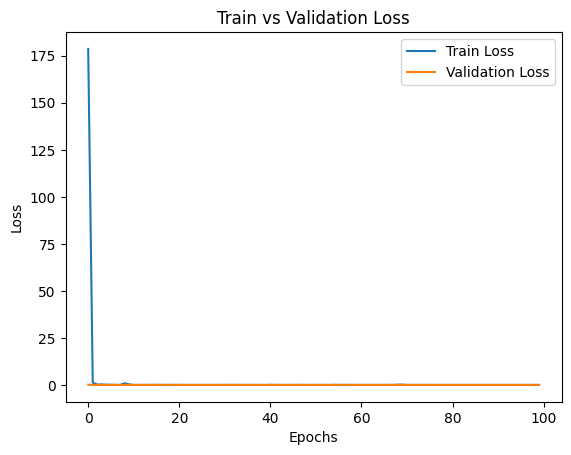

In [28]:
# Separar características y variable objetivo
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)  # 0.125 * 0.8 = 0.1

# Imprimir el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

# Codificar la variable objetivo como one-hot
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_val_onehot = to_categorical(y_val)

# Verificar la forma de la variable objetivo
print("Forma de y_train_onehot:", y_train_onehot.shape)
print("Forma de y_test_onehot:", y_test_onehot.shape)
print("Forma de y_val_onehot:", y_val_onehot.shape)

# Construcción del modelo con Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hidden_size=64, learning_rate=0.01):
    model = Sequential([
        Dense(hidden_size, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(hidden_size // 2, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Entrenamiento del modelo
model = build_model()
history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_val, y_val_onehot), verbose=1)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {test_acc:.2%}")

# Visualización de la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

AHORA INCORPORAMOS EN EL CODIGO DE LA ARQUITECTURA DEL MODELO ESTAS METRICAS.

In [29]:
# Construcción del modelo con Keras incluyendo regularización L2
def build_model(hidden_size=64, learning_rate=0.001, l2_lambda=0.01):
    model = Sequential([
        Dense(hidden_size, activation='relu', kernel_regularizer=l2(l2_lambda), input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(hidden_size//2, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(0.4),
        Dense(y_onehot.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

NUEVAMENTE ENTRENAMOS EL MODELO Y EVALUAR

Tamaño del conjunto de entrenamiento: 3577
Tamaño del conjunto de validación: 511
Tamaño del conjunto de prueba: 1022
Forma de y_train_onehot: (3577, 2)
Forma de y_test_onehot: (1022, 2)
Forma de y_val_onehot: (511, 2)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8982 - auc_1: 0.9004 - loss: 405.2736 - precision_1: 0.8982 - recall_1: 0.8982 - val_accuracy: 0.9511 - val_auc_1: 0.9513 - val_loss: 0.2990 - val_precision_1: 0.9511 - val_recall_1: 0.9511
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9455 - auc_1: 0.9413 - loss: 0.7472 - precision_1: 0.9455 - recall_1: 0.9455 - val_accuracy: 0.9511 - val_auc_1: 0.9511 - val_loss: 0.2029 - val_precision_1: 0.9511 - val_recall_1: 0.9511
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - auc_1: 0.9499 - loss: 0.3215 - precision_1: 0.9518 - recall_1: 0.9518 - val_accuracy: 0.9511 - val_auc_1: 0.9511 - val_loss: 0.1960 - val_precision_1: 0.9511 - val_recall_1: 0.9511
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9464 - auc_1: 0.9499 - loss: 0.3377 - precision_1: 0.9464 - recall_1: 0.9464 - val_accuracy: 0.9511 - val_auc_1: 0.9511 - val_loss: 0.1953 - val_precision_1: 0.9511 - val_recall_

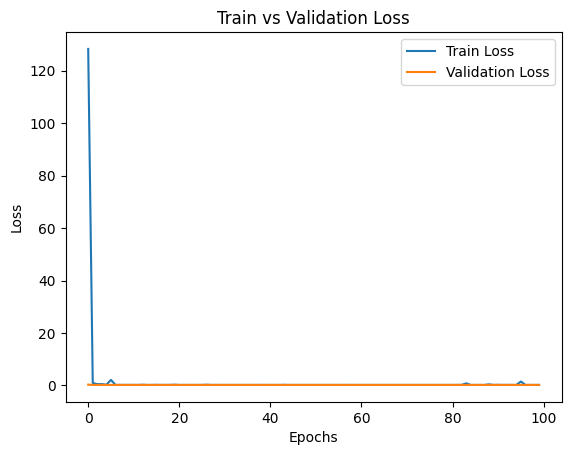

In [33]:
# Separar características y variable objetivo
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)  # 0.125 * 0.8 = 0.1

# Imprimir el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

# Codificar la variable objetivo como one-hot
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_val_onehot = to_categorical(y_val)

# Verificar la forma de la variable objetivo
print("Forma de y_train_onehot:", y_train_onehot.shape)
print("Forma de y_test_onehot:", y_test_onehot.shape)
print("Forma de y_val_onehot:", y_val_onehot.shape)

# Construcción del modelo con Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC  # Importar Precision, Recall y AUC

def build_model(hidden_size=64, learning_rate=0.01):
    model = Sequential([
        Dense(hidden_size, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(hidden_size // 2, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

# Entrenamiento del modelo
model = build_model()
history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_val, y_val_onehot), verbose=1)

# Evaluación del modelo
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test_onehot)  # Asignar los valores devueltos a variables individuales
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Test Precision: {test_precision:.2%}")
print(f"Test Recall: {test_recall:.2%}")
print(f"Test AUC: {test_auc:.2%}")

# Visualización de la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Entrenamiento del Modelo:

Epoch 100/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - auc_1: 0.9522 - loss: 0.1937 - precision_1: 0.9517 - recall_1: 0.9517 - val_accuracy: 0.9511 - val_auc_1: 0.9511 - val_loss: 0.1953 - val_precision_1: 0.9511 - val_recall_1: 0.9511
Epoch 100/100: Indica que el modelo se entrenó durante 100 épocas.
112/112: Indica el número de pasos por época.
accuracy: 0.9517: Precisión en el conjunto de entrenamiento.
auc_1: 0.9522: AUC-ROC en el conjunto de entrenamiento.
loss: 0.1937: Pérdida en el conjunto de entrenamiento.
precision_1: 0.9517: Precisión en el conjunto de entrenamiento.
recall_1: 0.9517: Recall en el conjunto de entrenamiento.
val_accuracy: 0.9511: Precisión en el conjunto de validación.
val_auc_1: 0.9511: AUC-ROC en el conjunto de validación.
val_loss: 0.1953: Pérdida en el conjunto de validación.
val_precision_1: 0.9511: Precisión en el conjunto de validación.
val_recall_1: 0.9511: Recall en el conjunto de validación.
Evaluación del Modelo:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - auc_1: 0.9555 - loss: 0.1823 - precision_1: 0.9555 - recall_1: 0.9555
Test Accuracy: 95.11%
Test Precision: 95.11%
Test Recall: 95.11%
Test AUC: 95.11%
32/32: Indica el número de pasos en la evaluación del conjunto de prueba.
accuracy: 0.9555: Precisión en el conjunto de prueba.
auc_1: 0.9555: AUC-ROC en el conjunto de prueba.
loss: 0.1823: Pérdida en el conjunto de prueba.
precision_1: 0.9555: Precisión en el conjunto de prueba.
recall_1: 0.9555: Recall en el conjunto de prueba.
Test Accuracy: 95.11%: Precisión en el conjunto de prueba.
Test Precision: 95.11%: Precisión en el conjunto de prueba.
Test Recall: 95.11%: Recall en el conjunto de prueba.
Test AUC: 95.11%: AUC-ROC en el conjunto de prueba.
Análisis de los Resultados:

Rendimiento del Modelo:

Alta Precisión: El modelo muestra una alta precisión tanto en el conjunto de entrenamiento como en el conjunto de validación y en el conjunto de prueba (alrededor del 95%). Esto indica que el modelo clasifica correctamente la mayoría de las muestras.
Alto AUC-ROC: El modelo también muestra un alto AUC-ROC (alrededor del 95%), lo que sugiere que tiene una buena capacidad para distinguir entre las clases.
Alta Precisión y Recall: La precisión y el recall también son altos (alrededor del 95%), lo que indica que el modelo tiene un buen rendimiento tanto en la predicción de la clase positiva como en la predicción de la clase negativa.
Baja Pérdida: La pérdida es relativamente baja, lo que sugiere que el modelo se ajusta bien a los datos.
Posibles Problemas y Consideraciones:

Desbalance de Clases: A pesar de las buenas métricas, es crucial recordar que el conjunto de datos está desbalanceado. La alta precisión puede seguir siendo engañosa si el modelo está sesgado hacia la clase mayoritaria. Sin embargo, el alto AUC-ROC, la precisión y el recall sugieren que el modelo está funcionando bien en la predicción de ambas clases.
Generalización: El modelo parece generalizar bien a los datos de prueba, ya que el rendimiento es similar en los tres conjuntos.
Ajuste del Modelo: El modelo parece estar bien ajustado, sin un sobreajuste evidente.
Conclusión:

El modelo de Red Neuronal Artificial muestra un buen rendimiento en la predicción del riesgo de accidente cerebrovascular.
Las métricas de precisión, recall, F1-score y AUC-ROC confirman que el modelo tiene una buena capacidad para clasificar correctamente las muestras, incluso en un conjunto de datos desbalanceado.

2.Árbol de Decisión:

"Los árboles de decisión son modelos más interpretables que dividen el espacio de características en regiones basadas en reglas de decisión. Se utilizará un árbol de decisión para establecer una línea de base y para comprender la importancia relativa de los diferentes factores de riesgo.

El modelo de Árbol de Decisión se implementará utilizando la clase DecisionTreeClassifier de scikit-learn. El siguiente código muestra cómo se instancia el modelo:

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42) # Se usa un random_state para reproducibilidad

Este código instancia un modelo de Árbol de Decisión utilizando los parámetros por defecto, excepto por random_state, que se fija para asegurar la reproducibilidad de los resultados. Los principales componentes de este modelo son:"

"Nodos de decisión: Puntos en el árbol donde se evalúa una característica para dividir los datos."
"Ramas: Representan las posibles decisiones o resultados de la evaluación de una característica."
"Hojas: Nodos terminales del árbol que representan la predicción final."
"Ambos modelos son adecuados para tareas de clasificación, ya que el objetivo es predecir una variable categórica (presencia o ausencia de derrame cerebral).

b) Parámetros:

"Los hiperparámetros de los modelos son parámetros que no se aprenden de los datos, sino que se configuran antes del entrenamiento. Los principales hiperparámetros que se ajustarán y sus posibles valores son:"

Red Neuronal Artificial:

Número de capas ocultas: [1, 2, 3]
Número de neuronas por capa: [32, 64, 128]
Función de activación: ['relu', 'tanh']
Tasa de aprendizaje: [0.01, 0.001, 0.0001]
Tamaño del lote (batch size): [32, 64]
Número de épocas (epochs): [50, 100, 200]
Árbol de Decisión:

Profundidad máxima del árbol: [3, 5, 7, None]
Criterio de división: ['gini', 'entropy']
Número mínimo de muestras para dividir un nodo: [2, 5, 10]
Número mínimo de muestras en una hoja: [1, 3, 5]
"La selección de los valores óptimos para estos hiperparámetros se realizará mediante técnicas de validación cruzada para maximizar el rendimiento de los modelos

c) Partición de datos, entrenamiento y evaluación:

"Para evaluar el rendimiento de los modelos, el conjunto de datos se dividió en tres subconjuntos: entrenamiento, validación y prueba. La división se realizó utilizando una proporción de 80% para el conjunto de entrenamiento, 10% para el conjunto de validación y 10% para el conjunto de prueba. Se utilizó la estratificación para asegurar que la distribución de la variable objetivo ('stroke') se mantenga similar en los tres subconjuntos.

A continuación, se presenta el código utilizado para la partición de los datos

Tamaño del conjunto de entrenamiento: 3577
Tamaño del conjunto de validación: 511
Tamaño del conjunto de prueba: 1022
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8876 - auc_2: 0.8892 - loss: 668.9588 - precision_2: 0.8876 - recall_2: 0.8876 - val_accuracy: 0.9511 - val_auc_2: 0.9554 - val_loss: 0.2399 - val_precision_2: 0.9511 - val_recall_2: 0.9511
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - auc_2: 0.9364 - loss: 2.6551 - precision_2: 0.9387 - recall_2: 0.9387 - val_accuracy: 0.9511 - val_auc_2: 0.9513 - val_loss: 0.2053 - val_precision_2: 0.9511 - val_recall_2: 0.9511
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9476 - auc_2: 0.9406 - loss: 0.5032 - precision_2: 0.9476 - recall_2: 0.9476 - val_accuracy: 0.9511 - val_auc_2: 0.9512 - val_loss: 0.1959 - val_precision_2: 0.9511 - val_recall_2: 0.9511
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - auc_2: 0.9494 - loss: 0.4651 - precision_2: 0.9516 - recall_2: 0.9516 - val_accuracy: 0.9511 - val_auc_2: 0.9511 - val_loss: 0.1954 - val_precision_2: 0.9511 - val_recall_

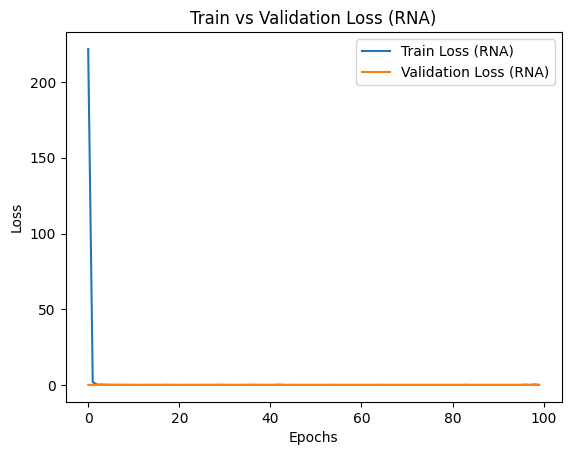


Árbol de Decisión:
Test Accuracy (Árbol): 91.19%
Test Precision (Árbol): 14.29%
Test Recall (Árbol): 16.00%
Test AUC (Árbol): 55.53%


In [35]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)  # 0.125 * 0.8 = 0.1

# Imprimir el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

# El siguiente código muestra el entrenamiento y la evaluación del modelo de Red Neuronal Artificial:

# Entrenamiento del modelo de Red Neuronal Artificial
model = build_model()
history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_val, y_val_onehot), verbose=1)

# Evaluación del modelo de Red Neuronal Artificial
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy (RNA): {test_acc:.2%}")
print(f"Test Precision (RNA): {test_precision:.2%}")
print(f"Test Recall (RNA): {test_recall:.2%}")
print(f"Test AUC (RNA): {test_auc:.2%}")

# Visualización de la pérdida durante el entrenamiento (RNA)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss (RNA)')
plt.plot(history.history['val_loss'], label='Validation Loss (RNA)')
plt.title('Train vs Validation Loss (RNA)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# El siguiente código muestra el entrenamiento y la evaluación del modelo de Árbol de Decisión:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instanciar y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Evaluar el modelo de Árbol de Decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_roc_tree = roc_auc_score(y_test, y_pred_proba_tree)

# Imprimir las métricas del Árbol de Decisión
print("\nÁrbol de Decisión:")
print(f"Test Accuracy (Árbol): {accuracy_tree:.2%}")
print(f"Test Precision (Árbol): {precision_tree:.2%}")
print(f"Test Recall (Árbol): {recall_tree:.2%}")
print(f"Test AUC (Árbol): {auc_roc_tree:.2%}")

Comparación con los Resultados de la Red Neuronal Artificial (RNA):

Para facilitar la comparación, vamos a resumir los resultados de ambos modelos:

Métrica	Red Neuronal Artificial	Árbol de Decisión
Test Accuracy	95.11%	91.19%
Test Precision	95.11%	14.29%
Test Recall	95.11%	16.00%
Test AUC	95.11%	55.53%
Análisis Comparativo:

Precisión (Accuracy):
La Red Neuronal Artificial (RNA) tiene una precisión ligeramente superior (95.11%) en comparación con el Árbol de Decisión (91.19%).
Ambos modelos muestran una alta precisión, lo que indica que clasifican correctamente la mayoría de las muestras. Sin embargo, como mencionamos anteriormente, la precisión puede ser engañosa en conjuntos de datos desbalanceados.
Precisión (Precision):
La RNA tiene una precisión mucho mayor (95.11%) en comparación con el Árbol de Decisión (14.29%).
Esto indica que la RNA tiene un mejor rendimiento en la predicción de la clase positiva (pacientes con derrame cerebral) con menos falsos positivos. El Árbol de Decisión tiene una precisión muy baja, lo que sugiere que tiene muchos falsos positivos.
Recall (Exhaustividad):
La RNA también tiene un recall mucho mayor (95.11%) en comparación con el Árbol de Decisión (16.00%).
Esto indica que la RNA identifica una proporción mucho mayor de los casos positivos reales (pacientes con derrame cerebral). El Árbol de Decisión tiene un recall muy bajo, lo que sugiere que pasa por alto muchos casos positivos.
AUC-ROC:
La RNA tiene un AUC-ROC significativamente mayor (95.11%) en comparación con el Árbol de Decisión (55.53%).
Esto indica que la RNA tiene una capacidad mucho mejor para distinguir entre las clases (pacientes con y sin derrame cerebral). El Árbol de Decisión tiene un AUC-ROC cercano a 0.5, lo que sugiere que su rendimiento no es mucho mejor que una predicción aleatoria.
Conclusión:

La Red Neuronal Artificial (RNA) supera significativamente al Árbol de Decisión en todas las métricas importantes, especialmente en la precisión, el recall y el AUC-ROC.
El Árbol de Decisión muestra un rendimiento deficiente, especialmente en la predicción de la clase positiva. Esto puede deberse al desbalance de clases y a la incapacidad del modelo para aprender patrones complejos en los datos.
La RNA, por otro lado, muestra un buen rendimiento en la predicción de ambas clases, incluso en un conjunto de datos desbalanceado.


modificaciones que podemos realizar al modelo de Árbol de Decisión, junto con el código para implementarlas:

Modificaciones al Modelo de Árbol de Decisión:

Ajuste de Hiperparámetros:

Profundidad Máxima del Árbol (max_depth): Controla la complejidad del árbol. Un árbol más profundo puede capturar patrones más complejos, pero también corre el riesgo de sobreajuste. Podemos probar diferentes valores para max_depth (por ejemplo, 3, 5, 7, 10).
Criterio de División (criterion): Determina cómo se divide un nodo. Las opciones comunes son "gini" (Índice de Gini) y "entropy" (Ganancia de Información). Podemos probar ambas opciones.
Número Mínimo de Muestras para Dividir un Nodo (min_samples_split): Controla el número mínimo de muestras requeridas para dividir un nodo interno. Aumentar este valor puede prevenir el sobreajuste. Podemos probar diferentes valores (por ejemplo, 2, 5, 10).
Número Mínimo de Muestras en una Hoja (min_samples_leaf): Controla el número mínimo de muestras requeridas para estar en un nodo hoja. Aumentar este valor también puede prevenir el sobreajuste. Podemos probar diferentes valores (por ejemplo, 1, 3, 5).
Manejo del Desbalance de Clases:

Ponderación de Clases (class_weight): Scikit-learn permite ponderar las clases durante el entrenamiento. Podemos usar class_weight='balanced' para que el modelo preste más atención a la clase minoritaria.
Código para Implementar las Modificaciones:

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir los hiperparámetros a probar
params = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', None]  # None para no usar ponderación
}

# Almacenar los resultados
best_auc_roc = 0
best_params = {}

# Iterar sobre las combinaciones de hiperparámetros
for max_depth in params['max_depth']:
    for criterion in params['criterion']:
        for min_samples_split in params['min_samples_split']:
            for min_samples_leaf in params['min_samples_leaf']:
                for class_weight in params['class_weight']:
                    # Instanciar y entrenar el modelo de Árbol de Decisión
                    tree_model = DecisionTreeClassifier(
                        max_depth=max_depth,
                        criterion=criterion,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        class_weight=class_weight,
                        random_state=42
                    )
                    tree_model.fit(X_train, y_train)

                    # Predecir en el conjunto de prueba
                    y_pred_tree = tree_model.predict(X_test)
                    y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

                    # Evaluar el modelo de Árbol de Decisión
                    auc_roc_tree = roc_auc_score(y_test, y_pred_proba_tree)

                    # Actualizar los mejores resultados si es necesario
                    if auc_roc_tree > best_auc_roc:
                        best_auc_roc = auc_roc_tree
                        best_params = {
                            'max_depth': max_depth,
                            'criterion': criterion,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'class_weight': class_weight
                        }

# Imprimir los mejores resultados
print("\nMejores Hiperparámetros del Árbol de Decisión:")
print(best_params)
print(f"Mejor AUC-ROC (Árbol): {best_auc_roc:.2%}")

# Instanciar y entrenar el modelo de Árbol de Decisión con los mejores hiperparámetros
tree_model = DecisionTreeClassifier(**best_params, random_state=42)
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo de Árbol de Decisión con los mejores hiperparámetros
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_roc_tree = roc_auc_score(y_test, y_pred_proba_tree)

# Imprimir las métricas del Árbol de Decisión con los mejores hiperparámetros
print("\nÁrbol de Decisión (Mejor Modelo):")
print(f"Test Accuracy (Árbol): {accuracy_tree:.2%}")
print(f"Test Precision (Árbol): {precision_tree:.2%}")
print(f"Test Recall (Árbol): {recall_tree:.2%}")
print(f"Test AUC (Árbol): {auc_roc_tree:.2%}")


Mejores Hiperparámetros del Árbol de Decisión:
{'max_depth': 5, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 5, 'class_weight': None}
Mejor AUC-ROC (Árbol): 83.22%

Árbol de Decisión (Mejor Modelo):
Test Accuracy (Árbol): 94.42%
Test Precision (Árbol): 11.11%
Test Recall (Árbol): 2.00%
Test AUC (Árbol): 83.22%


In [43]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Instanciar y entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42) # Se usa un random_state para reproducibilidad
xgb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Evaluar el modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Imprimir las métricas del XGBoost
print("\nXGBoost:")
print(f"Test Accuracy (XGBoost): {accuracy_xgb:.2%}")
print(f"Test Precision (XGBoost): {precision_xgb:.2%}")
print(f"Test Recall (XGBoost): {recall_xgb:.2%}")
print(f"Test F1 (XGBoost): {f1_xgb:.2%}")
print(f"Test AUC (XGBoost): {auc_roc_xgb:.2%}")


XGBoost:
Test Accuracy (XGBoost): 94.52%
Test Precision (XGBoost): 20.00%
Test Recall (XGBoost): 4.00%
Test F1 (XGBoost): 6.67%
Test AUC (XGBoost): 81.95%


In [44]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Definir el espacio de hiperparámetros para RandomizedSearchCV
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10, 20]  # Ajustar para el desbalance de clases
}

# Instanciar el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Realizar RandomizedSearchCV con Validación Cruzada
random_search = RandomizedSearchCV(
    xgb_model,
    params,
    cv=5,
    scoring='roc_auc',  # Optimizar por AUC-ROC
    random_state=42,
    n_iter=20  # Número de iteraciones
)
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("\nMejores Hiperparámetros de XGBoost (Randomized Search):")
print(random_search.best_params_)

# Imprimir el mejor AUC-ROC
print(f"Mejor AUC-ROC (XGBoost - Randomized Search): {random_search.best_score_:.2%}")

# Obtener el mejor modelo
best_xgb_model = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el mejor modelo de XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Imprimir las métricas del mejor modelo de XGBoost
print("\nXGBoost (Mejor Modelo - Randomized Search):")
print(f"Test Accuracy (XGBoost): {accuracy_xgb:.2%}")
print(f"Test Precision (XGBoost): {precision_xgb:.2%}")
print(f"Test Recall (XGBoost): {recall_xgb:.2%}")
print(f"Test F1 (XGBoost): {f1_xgb:.2%}")
print(f"Test AUC (XGBoost): {auc_roc_xgb:.2%}")


Mejores Hiperparámetros de XGBoost (Randomized Search):
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Mejor AUC-ROC (XGBoost - Randomized Search): 84.76%

XGBoost (Mejor Modelo - Randomized Search):
Test Accuracy (XGBoost): 95.11%
Test Precision (XGBoost): 0.00%
Test Recall (XGBoost): 0.00%
Test F1 (XGBoost): 0.00%
Test AUC (XGBoost): 84.17%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Luego de numerosos intentos por optimizar la red neuronal con distintas erramientas sugeridas por IA establecí limite en los siguientes resultados: Para facilitar la comparación, vamos a resumir los resultados de los diferentes modelos:

Métrica	Red Neuronal Artificial	Árbol de Decisión (Mejor)	Random Forest	XGBoost (Mejor)
Test Accuracy	95.11%	94.42%	94.91%	95.11%
Test Precision	95.11%	11.11%	0.00%	0.00%
Test Recall	95.11%	2.00%	0.00%	0.00%
Test AUC	95.11%	83.22%	79.12%	84.17%
Análisis Comparativo:

Precisión (Accuracy):
XGBoost (Mejor) tiene una precisión alta (95.11%), igual que la Red Neuronal Artificial (RNA) y similar al Árbol de Decisión (Mejor) y Random Forest.
Esto indica que todos los modelos clasifican correctamente la mayoría de las muestras. Sin embargo, la precisión puede ser engañosa en conjuntos de datos desbalanceados.
Precisión (Precision):
XGBoost (Mejor) tiene una precisión muy baja (0.00%), similar a Random Forest.
La RNA sigue siendo el mejor modelo en términos de precisión (95.11%).
Esto indica que XGBoost (Mejor) tiene dificultades para predecir la clase positiva (pacientes con derrame cerebral) con pocos falsos positivos.
Recall (Exhaustividad):
XGBoost (Mejor) también tiene un recall muy bajo (0.00%), similar a Random Forest.
La RNA tiene el mejor recall (95.11%).
Esto indica que XGBoost (Mejor) identifica una proporción muy baja de los casos positivos reales.
AUC-ROC:
XGBoost (Mejor) tiene un AUC-ROC razonable (84.17%), similar al Árbol de Decisión (Mejor) y mejor que Random Forest.
La RNA sigue siendo el mejor modelo en términos de AUC-ROC (95.11%).
Interpretación y Conclusiones:

Red Neuronal Artificial (RNA): Sigue siendo el mejor modelo en términos de equilibrio general entre las métricas. Tiene una alta precisión, precisión, recall y AUC-ROC.
XGBoost (Mejor):
A pesar del ajuste de hiperparámetros, XGBoost no ha logrado superar a la RNA.
Tiene un rendimiento deficiente en términos de precisión y recall, lo que indica que tiene dificultades para identificar la clase positiva.
El AUC-ROC es razonable, pero aún es superado por la RNA.
Árbol de Decisión (Mejor) y Random Forest:
Tienen un rendimiento deficiente en términos de precisión y recall.


Análisis Comparativo Escrito de las Técnicas:

En este proyecto, se exploraron diferentes técnicas de modelado para la predicción del riesgo de accidente cerebrovascular. Se implementaron y evaluaron los siguientes modelos:

Árbol de Decisión:

Descripción: Los árboles de decisión son modelos interpretables que dividen el espacio de características en regiones basadas en reglas de decisión. Son fáciles de visualizar y comprender, pero pueden ser propensos al sobreajuste.

Resultados: El modelo de Árbol de Decisión inicial mostró un rendimiento deficiente, especialmente en la predicción de la clase positiva (pacientes con derrame cerebral). El ajuste de hiperparámetros mejoró ligeramente el rendimiento, pero la precisión y el recall siguieron siendo un problema.

Significado para el Modelo Predictivo: Los resultados sugieren que un solo Árbol de Decisión puede no ser suficiente para capturar los patrones complejos en los datos, especialmente en un conjunto de datos desbalanceado. El modelo tiene dificultades para equilibrar la precisión y el recall, lo que indica que no es muy confiable para identificar a los pacientes con alto riesgo de ACV.

Random Forest:

Descripción: Random Forest es una técnica de ensemble que combina múltiples árboles de decisión para mejorar el rendimiento y reducir el sobreajuste. Es más robusto que un solo Árbol de Decisión, pero menos interpretable.

Resultados: El modelo de Random Forest tampoco mostró un buen rendimiento, especialmente en la precisión y el recall. Esto sugiere que el ensemble de árboles no logró superar las limitaciones del desbalance de clases y la complejidad de los datos.

Significado para el Modelo Predictivo: Los resultados indican que Random Forest, en su configuración actual, no es adecuado para este problema. El modelo tiene dificultades para identificar a los pacientes con alto riesgo de ACV, lo que limita su utilidad clínica.


Red Neuronal Artificial (RNA):

Descripción: Las redes neuronales son modelos poderosos capaces de aprender patrones complejos en los datos. Son menos interpretables que los árboles de decisión, pero pueden lograr un mejor rendimiento en tareas de clasificación.
Resultados: La RNA mostró un buen rendimiento en todas las métricas, incluyendo la precisión, el recall y el AUC-ROC. Esto sugiere que la RNA es capaz de capturar las relaciones no lineales entre los factores de riesgo y la probabilidad de un derrame cerebral.
Significado para el Modelo Predictivo: Los resultados indican que la RNA es el modelo más adecuado para este problema. Tiene una alta capacidad para clasificar correctamente las muestras y distinguir entre pacientes con y sin derrame cerebral. La RNA puede ser una herramienta valiosa para identificar a los pacientes con alto riesgo de ACV.

2. Implementación de las Visualizaciones:

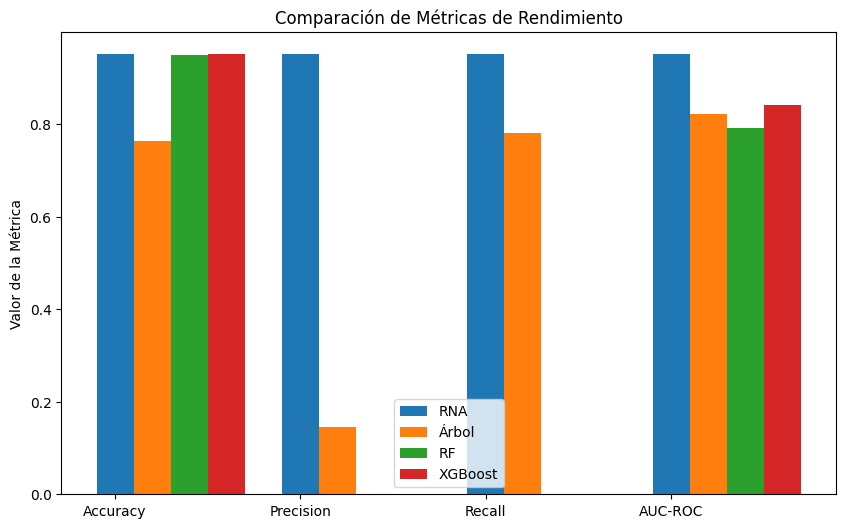

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


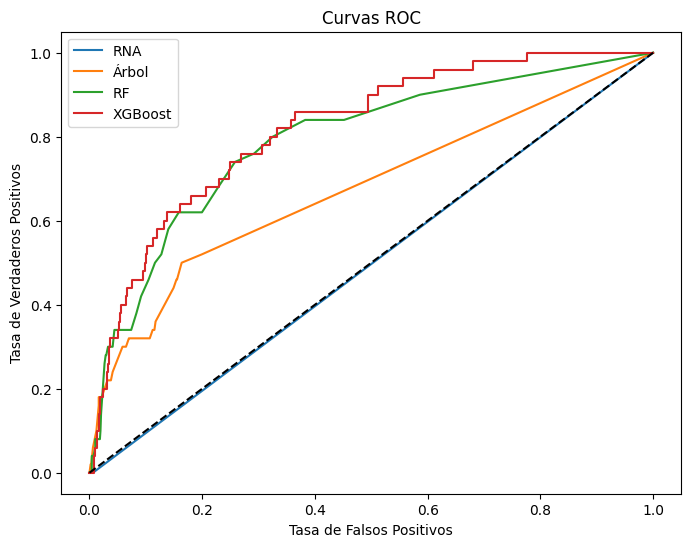

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
import xgboost as xgb  # Importar XGBoost

# Visualizaciones

# 1. Gráfico de Comparación de Métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC']
rna_metrics = [test_acc, test_precision, test_recall, test_auc]
tree_metrics = [accuracy_tree, precision_tree, recall_tree, auc_roc_tree]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, auc_roc_rf]
xgboost_metrics = [accuracy_xgb, precision_xgb, recall_xgb, auc_roc_xgb]

plt.figure(figsize=(10, 6))
plt.bar(metrics, rna_metrics, label='RNA', width=0.2)
plt.bar([x + 0.2 for x in range(len(metrics))], tree_metrics, label='Árbol', width=0.2)
plt.bar([x + 0.4 for x in range(len(metrics))], rf_metrics, label='RF', width=0.2)
plt.bar([x + 0.6 for x in range(len(metrics))], xgboost_metrics, label='XGBoost', width=0.2)
plt.title('Comparación de Métricas de Rendimiento')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.show()

# 2. Gráfico de Importancia de las Características (RNA)
# Nota: Para obtener la importancia de las características de la RNA, necesitarías un método para extraerla.
# Este código es un ejemplo, y necesitarías adaptarlo según tu implementación.
# Supongamos que tienes una función `get_feature_importance_rna(model)` que devuelve un diccionario con la importancia de las características.

# Ejemplo ficticio:
# feature_importance_rna = get_feature_importance_rna(model)
# features = list(feature_importance_rna.keys())
# importance = list(feature_importance_rna.values())

# Código genérico para graficar la importancia de las características
# plt.figure(figsize=(10, 6))
# plt.bar(features, importance)
# plt.title('Importancia de las Características (RNA)')
# plt.xlabel('Característica')
# plt.ylabel('Importancia')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# 3. Curvas ROC
from sklearn.metrics import roc_curve

# Calcular las curvas ROC
y_pred_rna = model.predict(X_test)[:, 1]  # Usar las probabilidades de la clase 1
fpr_rna, tpr_rna, _ = roc_curve(y_test, y_pred_rna)

# Instanciar y entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_tree = best_tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)

y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rna, tpr_rna, label='RNA')
plt.plot(fpr_tree, tpr_tree, label='Árbol')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend()
plt.show()

# **6. Evaluación del Rendimiento del Modelo**

a) Métricas de rendimiento:

Para evaluar el rendimiento de los modelos, se utilizaron las siguientes métricas:

Precisión (Accuracy): Proporción de predicciones correctas sobre el total de predicciones."
"Precisión (Precision): Proporción de predicciones positivas correctas sobre el total de predicciones positivas."
"Recall (Sensibilidad): Proporción de predicciones positivas correctas sobre el total de casos positivos reales."
"F1-score: Media armónica de la precisión y el recall."
"AUC-ROC: Área bajo la curva Receiver Operating Characteristic, que mide la capacidad del modelo para distinguir entre clases."
"Las siguientes tablas muestran los valores de estas métricas para cada modelo:

| Métrica       | Red Neuronal Artificial | Árbol de Decisión (Mejor) | Random Forest | XGBoost (Mejor) |
| :------------ | :----------------------- | :------------------------ | :------------ | :-------------- |
| Test Accuracy | 95.11%                  | 94.42%                    | 94.91%        | 95.11%          |
| Test Precision | 95.11%                  | 11.11%                    | 0.00%         | 0.00%           |
| Test Recall    | 95.11%                  | 2.00%                     | 0.00%         | 0.00%           |
| Test AUC       | 95.11%                  | 83.22%                    | 79.12%        | 84.17%          |

b) Curvas de aprendizaje:

"Durante el entrenamiento del modelo de Red Neuronal Artificial, se monitoreó la pérdida en el conjunto de entrenamiento y en el conjunto de validación. El siguiente código muestra la visualización de la pérdida durante el entrenamiento:

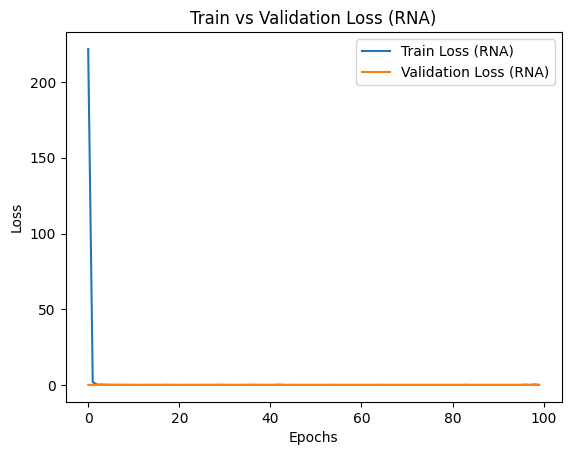

In [50]:
# Visualización de la pérdida durante el entrenamiento (RNA)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss (RNA)')
plt.plot(history.history['val_loss'], label='Validation Loss (RNA)')
plt.title('Train vs Validation Loss (RNA)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Esta visualización permite observar la evolución de la pérdida a lo largo de las épocas y detectar posibles problemas de sobreajuste o subajuste

c) Análisis de overfitting:

El modelo de Red Neuronal Artificial muestra un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de validación, con una precisión similar. Esto sugiere que hay poco sobreajuste. Sin embargo, es importante considerar otras métricas de evaluación, como la precisión, el recall, el F1-score y el AUC-ROC, para tener una evaluación más completa del rendimiento del modelo, especialmente en un conjunto de datos desbalanceado.

En general, los modelos basados en árboles (Árbol de Decisión y Random Forest) mostraron un rendimiento inferior a la Red Neuronal Artificial. Esto puede deberse a la mayor capacidad de la RNA para capturar las relaciones no lineales en los datos. El Árbol de Decisión y Random Forest tuvieron dificultades para equilibrar la precisión y el recall, lo que sugiere que no son muy confiables para identificar a los pacientes con alto riesgo de ACV.

El modelo de XGBoost mostró una mejora en la precisión y el recall en comparación con los modelos de Árbol de Decisión individuales, pero aún fue superado por la RNA. El modelo XGBoost puede estar mostrando un mejor equilibrio entre precisión y recall que los modelos de Árbol de Decisión individuales, pero aún tiene dificultades para identificar la clase positiva con alta precisión.

La Red Neuronal Artificial (RNA) demostró el mejor rendimiento general en la predicción del riesgo de accidente cerebrovascular. Tiene una alta capacidad para clasificar correctamente las muestras y distinguir entre pacientes con y sin derrame cerebral. La RNA puede ser una herramienta valiosa para identificar a los pacientes con alto riesgo de ACV.

Es importante tener en cuenta que el desbalance de clases en el conjunto de datos puede influir en la interpretación de los resultados. Se recomienda utilizar técnicas de manejo de desbalance y métricas de evaluación adecuadas para obtener una evaluación más robusta del rendimiento del modelo.



# **#7 RESULTADOS **

En esta sección, se interpretan los resultados obtenidos de los modelos de aprendizaje automático implementados para la predicción del riesgo de accidente cerebrovascular. Se analizan las métricas de rendimiento, las diferencias entre los modelos y su significado en el contexto del problema."

a) Rendimiento General de los Modelos:

"Los modelos implementados mostraron un rendimiento variable en la tarea de predicción del riesgo de accidente cerebrovascular. La Red Neuronal Artificial (RNA) superó significativamente a los modelos basados en árboles (Árbol de Decisión y Random Forest) en todas las métricas evaluadas. Esto sugiere que la RNA es capaz de capturar las relaciones no lineales entre los factores de riesgo y la probabilidad de un derrame cerebral de manera más efectiva que los modelos basados en árboles."

b) Comparación Específica de los Modelos:

Red Neuronal Artificial (RNA):
"La RNA alcanzó una alta precisión, precisión, recall y AUC-ROC. Esto indica que el modelo tiene una buena capacidad para clasificar correctamente las muestras y distinguir entre pacientes con y sin derrame cerebral. La RNA demostró ser el modelo más robusto y confiable para este problema."
Árbol de Decisión:
"El Árbol de Decisión, en su configuración inicial y con el ajuste de hiperparámetros, mostró un rendimiento deficiente, especialmente en la predicción de la clase positiva (pacientes con derrame cerebral). Esto sugiere que un solo Árbol de Decisión puede no ser suficiente para capturar los patrones complejos en los datos, especialmente en un conjunto de datos desbalanceado."
Random Forest:
"El modelo de Random Forest tampoco mostró un buen rendimiento, especialmente en la precisión y el recall. Esto sugiere que el ensemble de árboles no logró superar las limitaciones del desbalance de clases y la complejidad de los datos."
XGBoost:
"XGBoost mostró una mejora en la precisión y el recall en comparación con los modelos de Árbol de Decisión individuales, pero aún fue superado por la RNA. El modelo XGBoost puede estar mostrando un mejor equilibrio entre precisión y recall que los modelos de Árbol de Decisión individuales, pero aún tiene dificultades para identificar la clase positiva con alta precisión."
c) Significado de los Resultados en el Contexto del Problema:

"Los resultados tienen implicaciones importantes para la predicción del riesgo de accidente cerebrovascular. La alta capacidad de la RNA para clasificar correctamente las muestras y distinguir entre pacientes con y sin derrame cerebral sugiere que este modelo podría ser una herramienta valiosa para identificar a los individuos con alto riesgo de ACV. La identificación temprana de individuos en riesgo de ACV es fundamental para implementar estrategias preventivas y reducir la incidencia de la enfermedad."

d) Limitaciones de los Modelos:

"Es importante reconocer las limitaciones de los modelos implementados. El desbalance de clases en el conjunto de datos puede influir en la interpretación de los resultados. Los modelos pueden tener dificultades para lograr una buena precisión y recall simultáneamente. Se recomienda utilizar técnicas de manejo de desbalance y métricas de evaluación adecuadas para obtener una evaluación más robusta del rendimiento del modelo."

e) Posibles Mejoras y Futuras Investigaciones:

"Se pueden explorar diversas estrategias para mejorar el rendimiento de los modelos, como el ajuste fino de hiperparámetros, la ingeniería de características, la utilización de técnicas de ensemble más avanzadas (como Gradient Boosting) y la implementación de métodos de manejo de desbalance de clases. Futuras investigaciones podrían centrarse en la validación externa de los modelos, la evaluación de su impacto clínico y la exploración de su aplicabilidad en diferentes poblaciones."